In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
x_train = pd.read_csv('data/x_train_norm.csv', sep=';', na_values='?')
x_test = pd.read_csv('data/x_test_norm.csv', sep=';', na_values='?')
y_train = pd.read_csv('data/y_train.csv', sep=';', header=None, na_values='?')[0]

In [54]:
n_neighbors_array = range(1, 65)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print best_cv_err, best_n_neighbors

0.171537031911 50


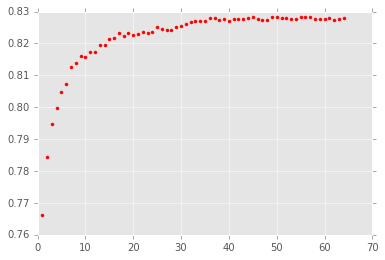

In [55]:
plt.plot(np.array(grid.cv_results_["param_n_neighbors"]), grid.cv_results_["mean_test_score"], '.r')

In [52]:
# weights='distance' - отличие
n_neighbors_array = range(1, 65)
knn = KNeighborsClassifier(5, weights='distance')
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print best_cv_err, best_n_neighbors

0.171537031911 57


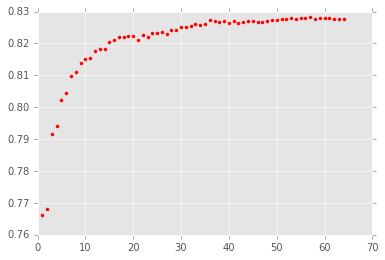

In [53]:
plt.plot(np.array(grid.cv_results_["param_n_neighbors"]), grid.cv_results_["mean_test_score"], '.r')

In [68]:
# Первая попытка:
# - не самый лучший классификатор (n=50 лучшк)
# - не использовалась вероятность
knn = KNeighborsClassifier(n_neighbors=37) #best_n_neighbors
knn.fit(x_train, y_train)
y_test = knn.predict(x_test)
res_df = pd.DataFrame(y_test, columns = ['y'])
res_df.to_csv('res/002_knn_37.csv', sep=';', header=None, index=False)

In [66]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train, y_train)
y_test = knn.predict_proba(x_test)[:,1]  # возвращается думерный массив, нас интересует 2-й стоблец
res_df = pd.DataFrame(y_test, columns = ['y'])
res_df.to_csv('res/002_knn_50.csv', sep=';', header=None, index=False)